In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
file_path = './data/riasec/cleaned_data.csv'
df = pd.read_csv(file_path)
df = df.loc[:, 'R1':'C8']

df.head()

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,...,E7,E8,C1,C2,C3,C4,C5,C6,C7,C8
0,3,4,3,1,1,4,1,3,5,5,...,1,3,1,3,1,1,1,3,1,1
1,1,1,2,4,1,2,2,1,5,5,...,1,3,1,1,2,1,1,2,1,1
2,2,1,1,1,1,1,1,1,4,1,...,4,3,1,3,2,2,1,2,4,1
3,3,1,1,2,2,2,2,2,4,1,...,2,3,3,2,3,3,2,2,2,2
4,4,1,1,2,1,1,1,2,5,5,...,2,2,4,2,2,4,5,5,2,2


In [3]:
batch_size = 500
total_data = len(df)
num_batches = total_data // batch_size + (1 if total_data % batch_size != 0 else 0)

print(f"Total data: {total_data}")
print(f"Total batch (dengan ukuran {batch_size}): {num_batches}")

Total data: 145828
Total batch (dengan ukuran 500): 292


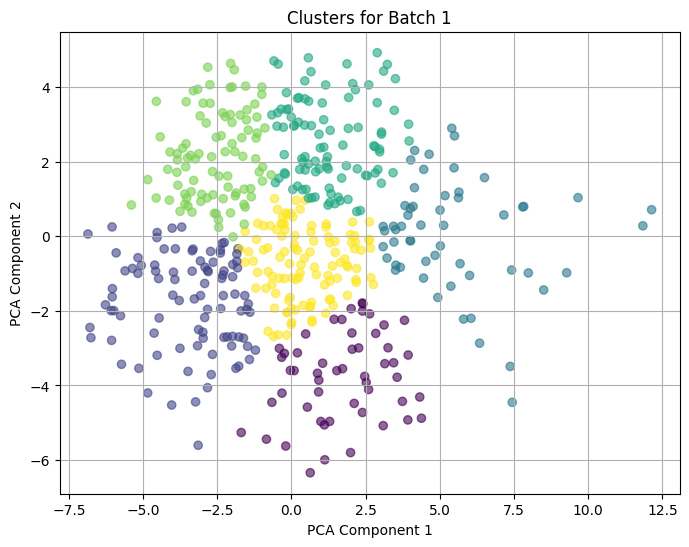

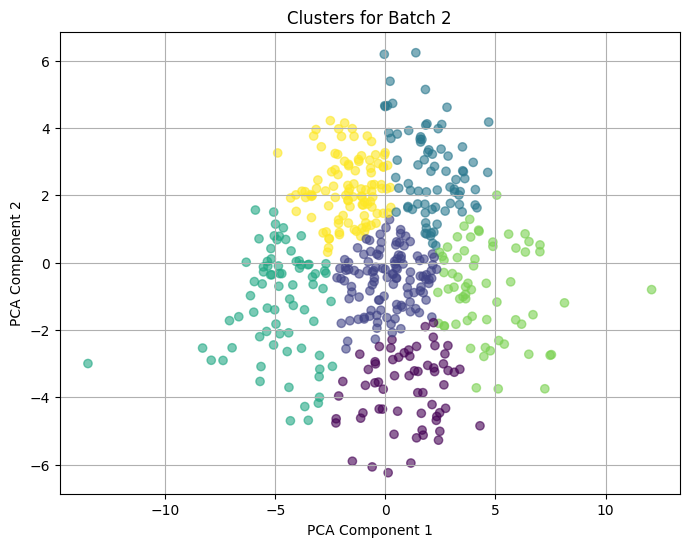

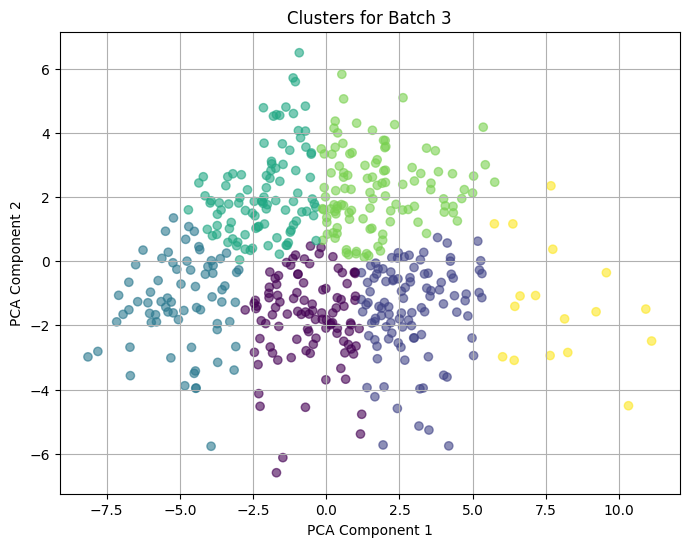

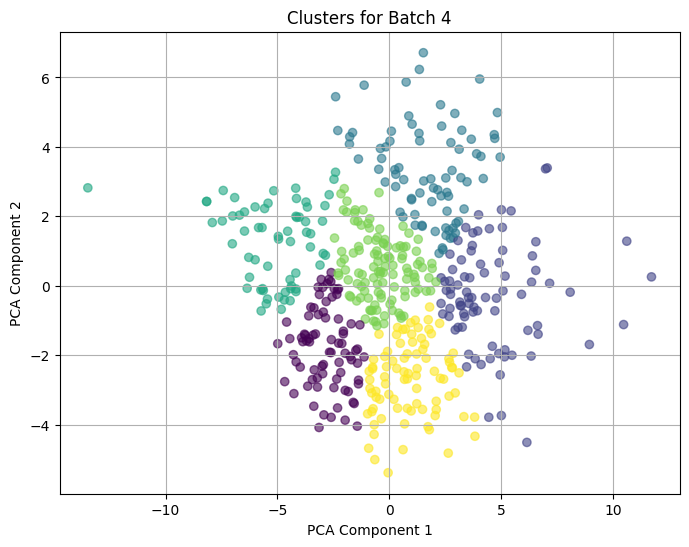

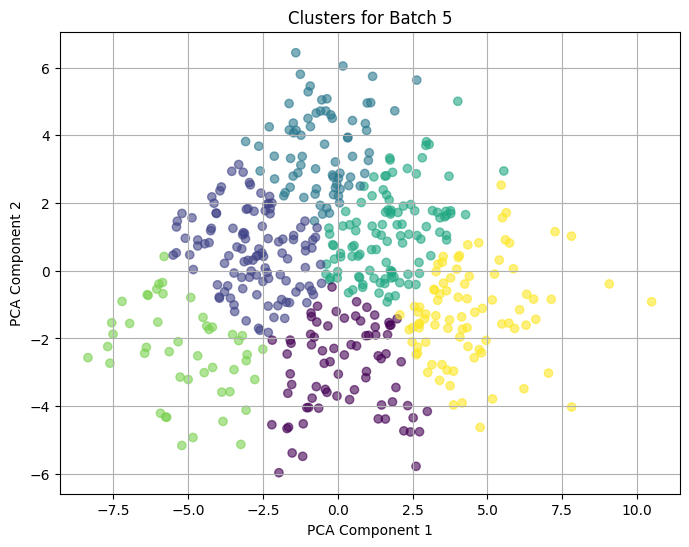

In [ ]:
clusters_all = []  

for batch in range(num_batches):
    start_idx = batch * batch_size
    end_idx = start_idx + batch_size
    data_subset = df.iloc[start_idx:end_idx]

    riasec_data = data_subset.select_dtypes(include=[np.number])

    scaler = StandardScaler()
    riasec_scaled = scaler.fit_transform(riasec_data)

    pca = PCA(n_components=2)
    riasec_pca = pca.fit_transform(riasec_scaled)

    kmeans = KMeans(n_clusters=6, random_state=42)
    clusters = kmeans.fit_predict(riasec_pca)

    clusters_all.extend(clusters)

    if batch < 5:
        plt.figure(figsize=(8, 6))
        plt.scatter(riasec_pca[:, 0], riasec_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.title(f'Clusters for Batch {batch + 1}')
        plt.grid(True)
        plt.show()

In [14]:
df['Cluster'] = clusters_all

df.to_csv('./data/riasec/clustered_data.csv', index=False)
print("Saved as 'clustered_data.csv'.")

Saved as 'clustered_data.csv'.


In [8]:
df.head()

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,...,E8,C1,C2,C3,C4,C5,C6,C7,C8,Cluster
0,3,4,3,1,1,4,1,3,5,5,...,3,1,3,1,1,1,3,1,1,3
1,1,1,2,4,1,2,2,1,5,5,...,3,1,1,2,1,1,2,1,1,4
2,2,1,1,1,1,1,1,1,4,1,...,3,1,3,2,2,1,2,4,1,1
3,3,1,1,2,2,2,2,2,4,1,...,3,3,2,3,3,2,2,2,2,5
4,4,1,1,2,1,1,1,2,5,5,...,2,4,2,2,4,5,5,2,2,3


In [12]:
sampled_data = pd.DataFrame()

for cluster in range(6):
    cluster_data = df[df['Cluster'] == cluster]
    
    sampled_cluster_data = cluster_data.sample(n=min(10, len(cluster_data)), random_state=42)
    
    sampled_data = pd.concat([sampled_data, sampled_cluster_data])

sampled_data.reset_index(drop=True, inplace=True)

sampled_data.to_csv('./data/riasec/sampled_data_per_cluster.csv', index=False)
print("Saved as 'sampled_data_per_cluster.csv'.")

Saved as 'sampled_data_per_cluster.csv'.
